# Stock Price Forecasting - MegaBUCKS

## Prerequisite

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

from pmdarima.arima import auto_arima

from nsepy import get_history
from datetime import date

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

import matplotlib.pyplot as plt

### Input Symbol

In [2]:
Symbol = input("Input NSE Stock Symbol: ")

Input NSE Stock Symbol: EXIDE


### Get Data

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = get_history(symbol=Symbol, start=date(2019,1,1), end=date.today()).fillna(0)
df_close=data["Close"]

### Data

In [5]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-01-01,EXIDEIND,EQ,267.95,268.50,270.70,266.75,266.75,267.50,268.30,735215,1.972605e+13,10219,178225,0.2424
2019-01-02,EXIDEIND,EQ,267.50,266.00,268.10,260.20,261.25,261.40,263.66,795469,2.097317e+13,12625,248548,0.3125
2019-01-03,EXIDEIND,EQ,261.40,260.00,262.65,256.60,257.80,257.50,259.16,1388814,3.599264e+13,17696,615295,0.4430
2019-01-04,EXIDEIND,EQ,257.50,258.00,260.25,254.75,259.50,258.75,257.73,817998,2.108222e+13,14532,276155,0.3376
2019-01-07,EXIDEIND,EQ,258.75,261.50,266.65,260.00,261.20,262.35,263.84,904616,2.386768e+13,12132,320490,0.3543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,EXIDEIND,EQ,158.40,159.75,160.00,156.15,157.45,157.40,158.08,2148075,3.395770e+13,13419,1050344,0.4890
2020-10-22,EXIDEIND,EQ,157.40,157.40,161.20,156.75,160.55,160.55,159.39,4068679,6.484938e+13,13901,2165899,0.5323
2020-10-23,EXIDEIND,EQ,160.55,161.50,163.35,159.25,161.70,162.05,161.44,4610251,7.442928e+13,29285,1832040,0.3974


## Forecasting

### Train Model

In [4]:
model = auto_arima(df_close.values, start_p=1, start_q=1,
                  test='adf',    # use adftest to find optimal 'd'
                  max_p=5, # maximum p
                  max_q=5, # maximum q
                  m=1, # frequency of series - m = 4, quaterly, m=12 Monthly
                  d=1,  # difference order d
                  seasonal=True, # Seasonal ARIMA, 
                  stepwise=True, with_intercept=False)

### Forecast Prices

In [5]:
horizons = 30
forecasted_values = model.predict(n_periods=30)

### Create Series

In [6]:
index_forecasted = np.arange(len(df_close.values), len(df_close.values) + horizons)
index_original = np.arange(0, len(df_close.values))

forecasted_series = pd.Series(forecasted_values, index=index_forecasted)
original_series = pd.Series(df_close.values, index=index_original)

### Plot Graph

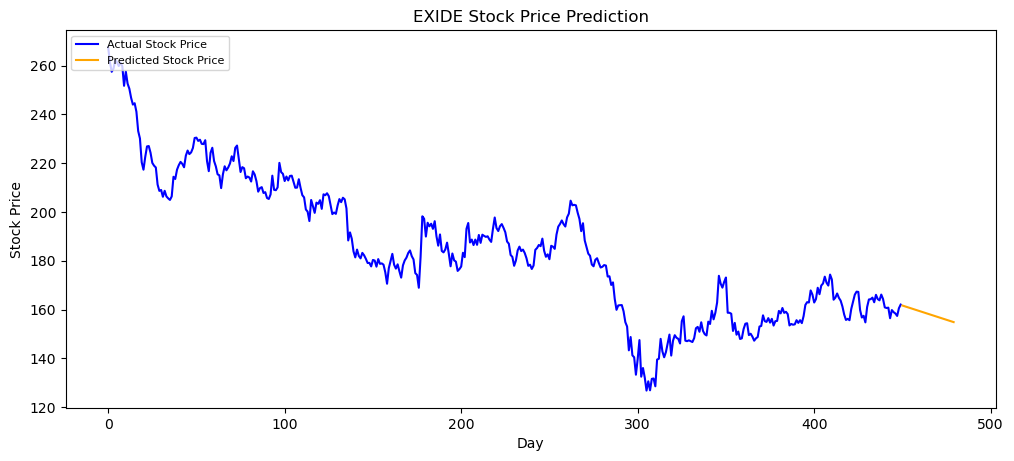

In [7]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(original_series, color = 'blue', label='Actual Stock Price')
plt.plot(forecasted_series, color = 'orange',label='Predicted Stock Price')

plt.title(Symbol+' Stock Price Prediction')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Accuracy Testing

### Split Data into Train and Test

In [8]:
train_data, test_data = df_close[1:int(len(df_close)*0.90)], df_close[int(len(df_close)*0.90):]

### Train Model

In [9]:
testmodel = auto_arima(train_data.values, start_p=1, start_q=1,
                  test='adf',    # use adftest to find optimal 'd'
                  max_p=5, # maximum p
                  max_q=5, # maximum q
                  m=1, # frequency of series - m = 4, quaterly, m=12 Monthly
                  d=1,  # difference order d
                  seasonal=True, # Seasonal ARIMA, 
                  stepwise=True, with_intercept=False)

### Forecast Values

In [10]:
# Forecast
predicted_values = testmodel.predict(n_periods=len(test_data))

### Create Series

In [11]:
index_predicted = np.arange(len(train_data.values), len(train_data.values)+len(test_data.values))
index_train = np.arange(0, len(train_data.values))
index_test = np.arange(len(train_data.values), len(train_data.values)+len(test_data.values))

predicted_series = pd.Series(predicted_values, index=index_predicted)
train_series = pd.Series(train_data.values, index=index_train)
test_series = pd.Series(test_data.values, index=index_test)

### Graph

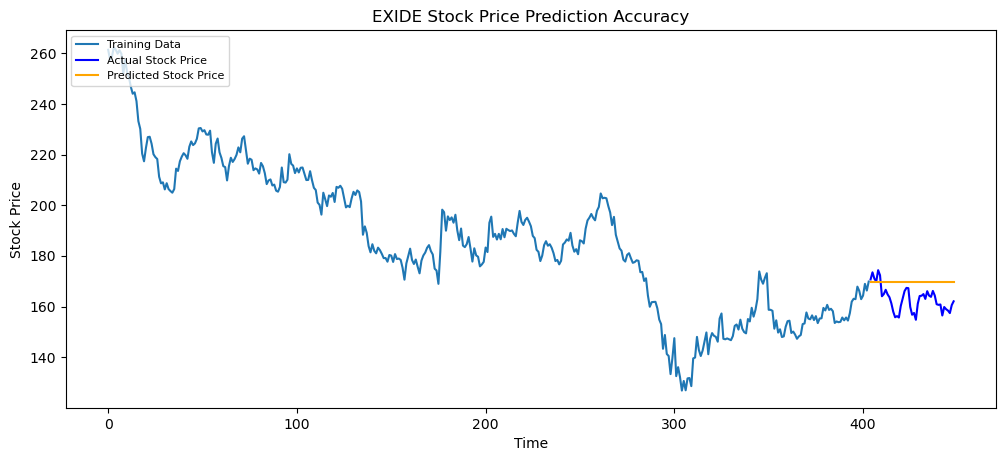

In [12]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_series, label='Training Data')
plt.plot(test_series, color = 'blue', label='Actual Stock Price')
plt.plot(predicted_series, color = 'orange',label='Predicted Stock Price')

plt.title(Symbol+' Stock Price Prediction Accuracy')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Get Error

In [13]:
# Error
rmse = math.sqrt(mean_squared_error(test_series, predicted_series))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(predicted_series - test_series)/np.abs(test_series))*100
print('MAPE: '+str(mape))

RMSE: 8.209907783986575
MAPE: 4.507277131594977
